## Notebook to test hypergeometric hypothesis in dispersion function for a maxwellian plasma

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

plt.style.use('dark_background')

%matplotlib inline

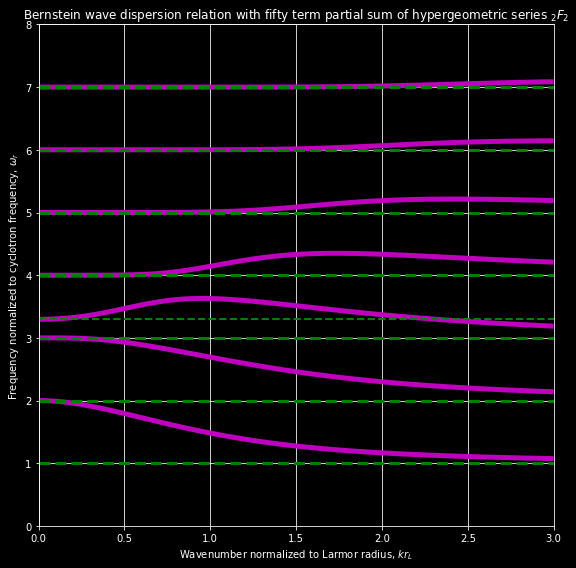

In [2]:
def hyper_series(s, om, k):
    num = sp.poch(0.5, s+1) # pochhammer symbol, or rising factorial
    denom = sp.rgamma(2.0 + s + om) * sp.rgamma(2.0 + s - om) # reciprocal gamma functions
    return num * denom * np.power(-2.0 * (k**2.0), s)

# parameters
a = np.pi # -0.5 * (1.0 - 5 **0.5) # plasma-cyclotron frequency ratio
# 1-grids
k = np.linspace(0, 3.0, num=300)
omr = np.linspace(0.0, 8.0, num=300)
# 2-grids
k2 = np.tensordot(k, np.ones_like(omr), axes=0)
o2 = np.tensordot(np.ones_like(k), omr, axes=0)

# for later: 3grids
# omi = np.linspace(0.0, 0.2, num=50)
# complex omega plane
# om = np.tensordot(omr, np.ones_like(omi), axes=0) + 1j * np.tensordot(np.ones_like(omr), omi, axes=0)
# 3-grids
# k3 = np.tensordot(k, np.real(np.ones_like(om)), axes=0)
# o3 = np.tensordot(np.ones_like(k), om, axes=0)
# print(k3.shape)

# ten term approximation?
rh = sp.sinc(o2) # right-hand and left-hand sides
lh = 2.0 * a ** 2.0 * np.array([hyper_series(s, o2, k2) for s in range(50)]).sum(axis=0)
total = lh + rh

plt.close('all')
plt.figure(figsize=(8,8))
plt.contour(k2, o2, total, 0, colors='m', linewidths=5)
plt.plot([0, k[-1]], np.array([1.0, 1.0]) * (1 + a**2.0)**0.5, 'g--', linewidth=2)
for i in range(1, int(np.floor(omr[-1]))):
    plt.plot([0, k[-1]], np.array([1.0, 1.0]) * i, 'g--', linewidth=3)
plt.grid(True)
plt.xlabel(r'Wavenumber normalized to Larmor radius, $kr_L$')
plt.ylabel(r'Frequency normalized to cyclotron frequency, $\omega_r$')
plt.title('Bernstein wave dispersion relation with fifty term partial sum of hypergeometric series $_2F_2$')
plt.tight_layout()
# plt.savefig('bernstein_fr_hyper.png')
plt.show()